In [1]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pydicom
import os
import sys
import torch

/opt/conda/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [3]:
f = h5py.File('mybucket/singleCoil/singlecoil_train/file1000001.h5')
print(f.keys())
print(f['ismrmrd_header'][()])
print(f.get('kspace'))

<KeysViewHDF5 ['ismrmrd_header', 'kspace', 'reconstruction_esc', 'reconstruction_rss']>
b'<?xml version="1.0"?>\n<ismrmrdHeader xmlns="http://www.ismrm.org/ISMRMRD" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:xs="http://www.w3.org/2001/XMLSchema" xsi:schemaLocation="http://www.ismrm.org/ISMRMRD ismrmrd.xsd">\n\t<studyInformation>\n\t\t<studyTime>19:04:38</studyTime>\n\t</studyInformation>\n\t<measurementInformation>\n\t\t<measurementID>41194_68727432_68727441_1018</measurementID>\n\t\t<patientPosition>FFS</patientPosition>\n\t\t<protocolName>COR</protocolName>\n\t\t<frameOfReferenceUID>1.3.12.2.1107.5.2.18.41194.1.20180402184152153.0.0.5015</frameOfReferenceUID>\n\t</measurementInformation>\n\t<acquisitionSystemInformation>\n\t\t<systemVendor>SIEMENS</systemVendor>\n\t\t<systemModel>Aera</systemModel>\n\t\t<systemFieldStrength_T>1.494000</systemFieldStrength_T>\n\t\t<relativeReceiverNoiseBandwidth>0.793000</relativeReceiverNoiseBandwidth>\n\t\t<receiverChannels>15</rece

In [4]:
ds = pydicom.dcmread('/home/wesselljack00/mybucket/dicom/knee_mri_clinical_seq_batch2/1FB_1001820591____1FB,_3331562518/study_2f43b031/MR4_53c76c27/00016_b409a3d44461af91.dcm')
print(ds.file_meta.TransferSyntaxUID)
print(ds.BitsAllocated)
print(ds.pixel_array.shape)
plt.imshow(ds.pixel_array)

FileNotFoundError: [Errno 2] No such file or directory: '/home/wesselljack00/mybucket/dicom/knee_mri_clinical_seq_batch2/1FB_1001820591____1FB,_3331562518/study_2f43b031/MR4_53c76c27/00016_b409a3d44461af91.dcm'

In [2]:
import fastmri
from fastmri.data import subsample
from fastmri.data import transforms, mri_data
from torch.utils.data import Dataset, DataLoader

mask_func = subsample.RandomMaskFunc(
    center_fractions=[0.08, 0.04],
    accelerations=[4, 8]
)
dataset = mri_data.SliceDataset(
    root='/home/wesselljack00/mybucket/singleCoil/singlecoil_test',
    transform=transforms.UnetDataTransform('singlecoil', mask_func=mask_func),
    challenge='singlecoil'
)

In [ ]:
'''spec ={
    'INIT': 'trunc_norm',
    'NUM_STAGES': 3,
    'PATCH_SIZE': [5, 3, 3],
    'PATCH_STRIDE': [2, 2, 2],
    'PATCH_PADDING': [1, 1,1],
    'DIM_EMBED': [32, 128, 256],
    'NUM_HEADS': [1, 4, 8],
    'DEPTH': [1, 2, 8],
    'MLP_RATIO': [4.0, 4.0,4.0],
    'ATTN_DROP_RATE': [0.0, 0.0,0.0],
    'DROP_RATE': [0.0, 0.0,0,0],
    'DROP_PATH_RATE': [0.0, 0.0,0.0],
    'QKV_BIAS': [True, True,True],
    'CLS_TOKEN': [False, False, False],
    'POS_EMBED': [False, False, False],
    'QKV_PROJ_METHOD': ['dw_bn', 'dw_bn', 'dw_bn'],
    'KERNEL_QKV': [3, 3, 3],
    'PADDING_KV': [1, 1,1],
    'STRIDE_KV': [2, 2,2],
    'PADDING_Q': [1, 1,1],
    'STRIDE_Q': [1, 1,1]
}'''

In [17]:
from models.mymodels import FastMRICVT
from models.cvt import ConvolutionalVisionTransformer
'''spec ={
    'INIT': 'trunc_norm',
    'NUM_STAGES': 3,
    'PATCH_SIZE': [5, 3, 3],
    'PATCH_STRIDE': [2, 2, 2],
    'PATCH_PADDING': [1, 1,1],
    'DIM_EMBED': [32, 128, 256],
    'NUM_HEADS': [1, 4, 8],
    'DEPTH': [1, 2, 8],
    'MLP_RATIO': [4.0, 4.0,4.0],
    'ATTN_DROP_RATE': [0.0, 0.0,0.0],
    'DROP_RATE': [0.0, 0.0,0,0],
    'DROP_PATH_RATE': [0.0, 0.0,0.0],
    'QKV_BIAS': [True, True,True],
    'CLS_TOKEN': [False, False, False],
    'POS_EMBED': [False, False, False],
    'QKV_PROJ_METHOD': ['dw_bn', 'dw_bn', 'dw_bn'],
    'KERNEL_QKV': [3, 3, 3],
    'PADDING_KV': [1, 1,1],
    'STRIDE_KV': [2, 2,2],
    'PADDING_Q': [1, 1,1],
    'STRIDE_Q': [1, 1,1]
}'''
spec ={
    'INIT': 'trunc_norm',
    'NUM_STAGES': 2,
    'PATCH_SIZE': [3, 3],
    'PATCH_STRIDE': [1,1],
    'PATCH_PADDING': [1, 1],
    'DIM_EMBED': [32, 64],
    'NUM_HEADS': [1, 2],
    'DEPTH': [1, 2],
    'MLP_RATIO': [2.0, 2.0],
    'ATTN_DROP_RATE': [0.0, 0.0],
    'DROP_RATE': [0.0, 0.0],
    'DROP_PATH_RATE': [0.0, 0.0],
    'QKV_BIAS': [True, True],
    'CLS_TOKEN': [False, False],
    'POS_EMBED': [False, False],
    'QKV_PROJ_METHOD': ['dw_bn', 'dw_bn'],
    'KERNEL_QKV': [3, 3],
    'PADDING_KV': [1, 1],
    'STRIDE_KV': [2, 2],
    'PADDING_Q': [1, 1],
    'STRIDE_Q': [1, 1]
}
model = FastMRICVT(
   spec = spec
).to(torch.device("cuda"))
print(sum(p.numel() for p in model.parameters()))

118714


In [18]:
test = dataset[0][0]
test = test[None, None, :, :].to(torch.device("cuda"))
print(model(test).shape)

OutOfMemoryError: CUDA out of memory. Tried to allocate 9.77 GiB (GPU 0; 14.58 GiB total capacity; 9.92 GiB already allocated; 4.48 GiB free; 9.96 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [11]:
train = mri_data.SliceDataset(
    root='/home/wesselljack00/mybucket/singleCoil/singlecoil_train',
    transform=transforms.UnetDataTransform('singlecoil', mask_func=mask_func),
    challenge='singlecoil'
)
print(len(train))

29393


In [9]:
from models.mymodels import FastMRIEncoderDecoder
from models.cmt import CMTEncoder
from models.lineardecoder import LinearDecoder
import torch.nn as nn
encoder = CMTEncoder(
    img_size=320, in_chans=1, num_classes=0, patch_size=4, embed_dim=64,
    depths=[2, 2, 6], kv_scale=[8, 4, 2], num_heads=[2, 4, 8], mlp_ratio=4.,
    qkv_bias=True, qk_scale=None, drop_rate=0., attn_drop_rate=0., drop_path_rate=0.1,
    use_rel_pos_embed=False, use_bn_in_attn=True, use_irffn=False, use_lpu=False,
    use_ghost_ffn=False, use_multi_merge=False, norm_layer=nn.LayerNorm
).to(torch.device("cuda"))
#decoder = LinearDecoder(img_size=320, num_classes=1, in_features=64*4).to(torch.device('cuda'))
pred = encoder(test)
model = FastMRIEncoderDecoder(encoder).to(torch.device('cuda'))
print(model(test))
print(sum(p.numel() for p in model.parameters()))

RuntimeError: Given groups=1, weight of size [64, 64, 1, 1], expected input[1, 1, 6400, 64] to have 64 channels, but got 1 channels instead

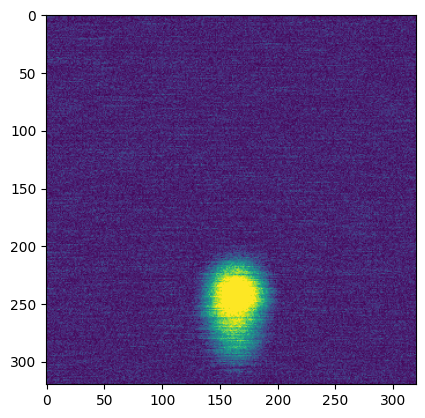

In [ ]:
plt.imshow(train[0][0])

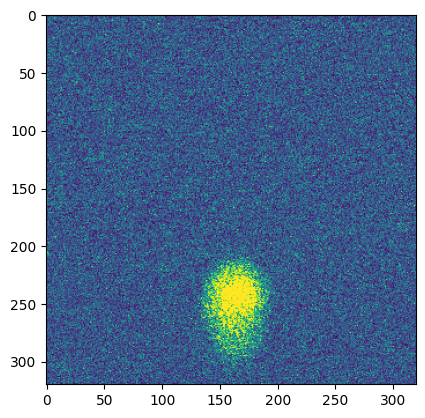

In [23]:
plt.imshow(train[0][1])

NameError: name 'train' is not defined